In [3]:
import pandas as pd
import numpy as np

import networkx as nx

import matplotlib.pyplot as plt
import matplotlib.animation as animation # Crear animaciones (gif, mp4)

import random

from IPython.display import Image # Mostrar las animaciones en el notebook

# Cargar los datos

In [10]:
data = pd.read_excel('Datos/Transacciones2.xlsx')
data_ordenada = data.sort_values(by = 'FECHA').reset_index(drop = True) # Ordenar por fecha la tabla (ascendente)

data_ordenada.head()

,index,CUENTA_ORIGEN,CUENTA_DESTINO,VALOR,FECHA,OPERACION_SOSPECHOSA
0,0,51,476,2.025365e+06,2025-01-01 03:22:11,0
1,1,55,29,3.303254e+06,2025-01-01 10:02:44,0
2,2,41,137,3.180270e+04,2025-01-01 12:59:11,0
3,3,47,195,1.314048e+06,2025-01-02 00:39:53,0
4,4,51,409,2.402676e+06,2025-01-02 07:18:10,0


# Crear funciones útiles

In [19]:
def crear_grafo(data):
    # Crear el grafo
    G = nx.DiGraph()
    for i, row in data.iterrows(): # Iterar fila por fila en data
        G.add_edge(row['CUENTA_ORIGEN'], row['CUENTA_DESTINO'], fecha=row['FECHA'], valor = row['VALOR'], sospechosa = row['OPERACION_SOSPECHOSA'])

    for nodo in G.nodes:
        G.nodes[nodo]['sospechoso'] = False
        G.nodes[nodo]['iteracion'] = None

    # Marcar a los nodos sospechosos iniciales
    for u, v, data in G.edges(data = True):
        if data['sospechosa'] == 1:
            G.nodes[u]['sospechoso'] = True
            G.nodes[v]['sospechoso'] = True
            G.nodes[u]['iteracion'] = 0
            G.nodes[v]['iteracion'] = 0
    
    return G

In [106]:
def propagar_sospecha(G, probabilidad=0.3, max_iter=5):
    sospechosos_actuales = {n for n in G.nodes if G.nodes[n]["sospechoso"]}
    historia = [sospechosos_actuales.copy()]

    for iteracion in range(max_iter):
        nuevos_sospechosos = set()
        for nodo in sospechosos_actuales:
            for vecino in G.successors(nodo):
                if not G.nodes[vecino]["sospechoso"] and random.random() < probabilidad:
                    G.nodes[vecino]["sospechoso"] = True
                    G.nodes[vecino]["iteracion"] = iteracion
                    nuevos_sospechosos.add(vecino)
            for vecino in G.predecessors(nodo):
                if not G.nodes[vecino]["sospechoso"] and random.random() < probabilidad:
                    G.nodes[vecino]["sospechoso"] = True
                    G.nodes[vecino]["iteracion"] = iteracion
                    nuevos_sospechosos.add(vecino)
        if not nuevos_sospechosos:
            break
        sospechosos_actuales = sospechosos_actuales.union(nuevos_sospechosos)
        historia.append(sospechosos_actuales.copy())

    cantidad_sospechosos = list(map(lambda x: len(x), historia))
    
    return historia, cantidad_sospechosos


In [108]:
G = crear_grafo(data_ordenada)

In [110]:
print(G)

DiGraph with 185 nodes and 198 edges


In [112]:
G.nodes(data = True)

NodeDataView({51: {'sospechoso': True, 'iteracion': 0}, 476: {'sospechoso': False, 'iteracion': None}, 55: {'sospechoso': False, 'iteracion': None}, 29: {'sospechoso': False, 'iteracion': None}, 41: {'sospechoso': True, 'iteracion': 0}, 137: {'sospechoso': False, 'iteracion': None}, 47: {'sospechoso': True, 'iteracion': 0}, 195: {'sospechoso': False, 'iteracion': None}, 409: {'sospechoso': False, 'iteracion': None}, 44: {'sospechoso': True, 'iteracion': 0}, 226: {'sospechoso': False, 'iteracion': None}, 42: {'sospechoso': True, 'iteracion': 0}, 332: {'sospechoso': False, 'iteracion': None}, 170: {'sospechoso': False, 'iteracion': None}, 45: {'sospechoso': True, 'iteracion': 0}, 9: {'sospechoso': False, 'iteracion': None}, 61: {'sospechoso': True, 'iteracion': 0}, 463: {'sospechoso': True, 'iteracion': 0}, 50: {'sospechoso': False, 'iteracion': None}, 40: {'sospechoso': False, 'iteracion': None}, 48: {'sospechoso': False, 'iteracion': None}, 25: {'sospechoso': False, 'iteracion': None},

In [114]:
G.edges(data = True)

OutEdgeDataView([(51, 476, {'fecha': Timestamp('2025-01-01 03:22:11'), 'valor': 2025364.975434813, 'sospechosa': 0}), (51, 409, {'fecha': Timestamp('2025-01-02 07:18:10'), 'valor': 2402676.30416223, 'sospechosa': 0}), (51, 443, {'fecha': Timestamp('2025-01-05 02:52:28'), 'valor': 2025884.194722666, 'sospechosa': 0}), (51, 323, {'fecha': Timestamp('2025-01-17 09:15:22'), 'valor': 4157374.295937927, 'sospechosa': 0}), (51, 347, {'fecha': Timestamp('2025-01-18 15:53:06'), 'valor': 3676945.028352358, 'sospechosa': 1}), (51, 262, {'fecha': Timestamp('2025-01-22 00:04:16'), 'valor': 3050159.696061859, 'sospechosa': 0}), (51, 59, {'fecha': Timestamp('2025-01-25 00:05:02'), 'valor': 658468.2687733521, 'sospechosa': 0}), (51, 181, {'fecha': Timestamp('2025-01-27 16:21:35'), 'valor': 2141601.971712788, 'sospechosa': 0}), (51, 477, {'fecha': Timestamp('2025-02-10 17:00:55'), 'valor': 41607.83038805512, 'sospechosa': 0}), (51, 482, {'fecha': Timestamp('2025-02-21 17:22:33'), 'valor': 3238582.51968

Iteración Nro. 0: 30 nodos sospechosos
Iteración Nro. 1: 35 nodos sospechosos
Iteración Nro. 2: 38 nodos sospechosos
Iteración Nro. 3: 44 nodos sospechosos
Iteración Nro. 4: 51 nodos sospechosos
Iteración Nro. 5: 59 nodos sospechosos
Iteración Nro. 6: 68 nodos sospechosos
Iteración Nro. 7: 74 nodos sospechosos
Iteración Nro. 8: 84 nodos sospechosos
Iteración Nro. 9: 86 nodos sospechosos
Iteración Nro. 10: 90 nodos sospechosos
Iteración Nro. 11: 92 nodos sospechosos
Iteración Nro. 12: 95 nodos sospechosos
Iteración Nro. 13: 98 nodos sospechosos
Iteración Nro. 14: 105 nodos sospechosos
Iteración Nro. 15: 113 nodos sospechosos
Iteración Nro. 16: 118 nodos sospechosos
Iteración Nro. 17: 120 nodos sospechosos
Iteración Nro. 18: 127 nodos sospechosos
Iteración Nro. 19: 128 nodos sospechosos
Iteración Nro. 20: 133 nodos sospechosos


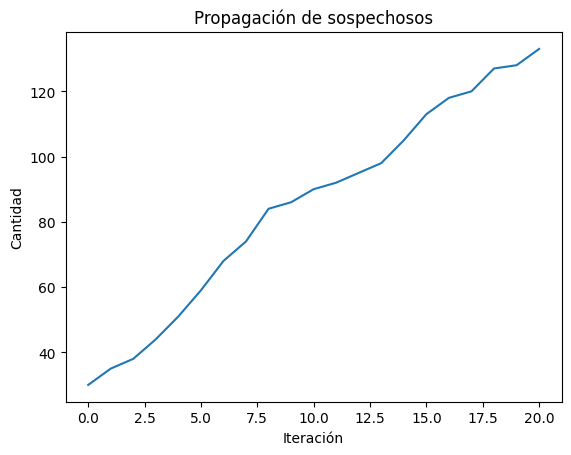

In [136]:
G = crear_grafo(data_ordenada)
historia, cantidad_sospechosos = propagar_sospecha(G, probabilidad = 0.1, max_iter = 20)

for i, cantidad in enumerate(cantidad_sospechosos):
    print(f'Iteración Nro. {i}: {cantidad} nodos sospechosos')

plt.figure()
plt.plot(cantidad_sospechosos)
plt.title('Propagación de sospechosos')
plt.xlabel('Iteración')
plt.ylabel('Cantidad')
plt.show()

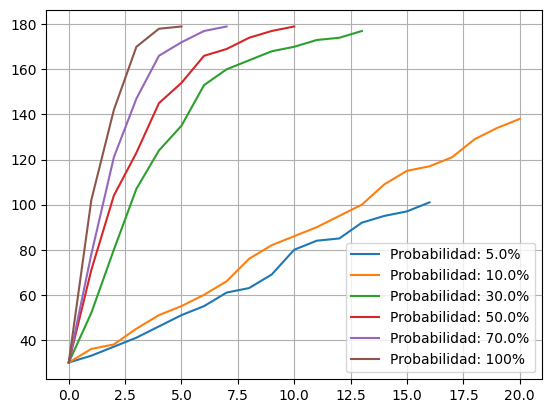

In [142]:
# Simulación de propagación para diferente probabilidades
probabilidades = [0.05, 0.1, 0.3, 0.5, 0.7, 1]

plt.figure()
for probabilidad in probabilidades:
    G = crear_grafo(data_ordenada)
    historia, cantidad_sospechosos = propagar_sospecha(G, probabilidad = probabilidad, max_iter = 20)
    plt.plot(cantidad_sospechosos, label = f'Probabilidad: {probabilidad * 100}%')
plt.legend()
plt.grid()
plt.show()

# Crear animación de la propagación

In [149]:
G = crear_grafo(data_ordenada)
# Ejecutar simulación
propagacion, cantidad_sospechosos = propagar_sospecha(G, probabilidad=100, max_iter=100)

# Preparar la animación
pos = nx.spring_layout(G, seed=42)
fig, ax = plt.subplots(figsize=(10, 7))

# Acumular nodos marcados como sospechosos en cada iteración
frames = []
acumulado = set()
for paso in propagacion:
    acumulado.update(paso)
    frames.append(acumulado.copy())

# Función de dibujo para cada frame
def draw_frame(i):
    ax.clear()
    sospechosos = frames[i]
    colores = ['red' if n in sospechosos else 'lightgray' for n in G.nodes]
    nx.draw(G, pos, ax=ax, with_labels=True, node_color=colores, node_size=200, edge_color='gray')
    ax.set_title(f"Propagación de Sospecha - Iteración {i}")
    ax.axis('off')

# Crear y guardar animación como GIF
ani = animation.FuncAnimation(fig, draw_frame, frames=len(frames), interval=1000, repeat=False)
ani.save("propagacion_iterativa.gif", writer='pillow', fps=1)
plt.close()

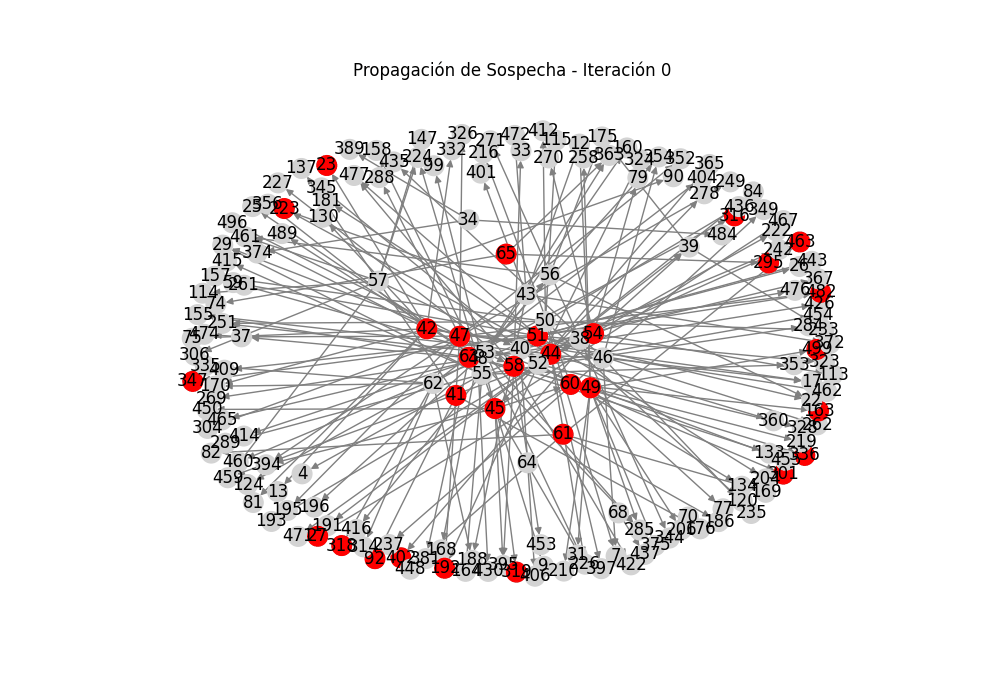

In [151]:
Image(filename="propagacion_iterativa.gif")